In [2]:
#PROJECT: Data Science 2 Hybrid Reccomendation System Tests
#ARBRI CENOLLI
#CIS 3200
#

In [3]:
import pandas as pd

from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
#Data: Movies

#genome_scores = pd.read_csv(r"C:\Users\Arbri\OneDrive\Desktop\movies\genome_scores.csv")
                           
#genome_tags = pd.read_csv(r"C:\Users\Arbri\OneDrive\Desktop\movies\genome_tags.csv")

#link = pd.read_csv(r"C:\Users\Arbri\OneDrive\Desktop\movies\link.csv")
                        
#movie = pd.read_csv(r"C:\Users\Arbri\OneDrive\Desktop\movies\movie.csv")

#rating = pd.read_csv(r"C:\Users\Arbri\OneDrive\Desktop\movies\rating.csv")

#tag = pd.read_csv(r"C:\Users\Arbri\OneDrive\Desktop\movies\tag.csv")


In [5]:
#First 5 rows of Genome Scores DF
print(genome_scores.head())


   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


In [6]:
#First 5 rows of
print(genome_tags.head())



   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


In [7]:
#First 5 rows of
print(link.head())



   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [8]:
#First 5 rows of
print(movie.head())



   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [9]:
#First 5 rows of
print(rating.head())



   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


In [10]:
#First 5 rows of
print(tag.head())



   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18


In [11]:
#Merging Datasets 

import pandas as pd

# Merge ratings with movies
ratings_with_movies = pd.merge(rating, movie[['movieId', 'title', 'genres']], on='movieId')

# Merge genome scores with movies
genome_scores_with_movies = pd.merge(genome_scores, movie[['movieId', 'title']], on='movieId')

# Merge genome tags with genome scores
genome_scores_with_tags = pd.merge(genome_scores_with_movies, genome_tags, on='tagId')

# Merge links with movies (Optional)
movies_with_links = pd.merge(movie, link, on='movieId')

# Merge tags with ratings (Optional)
tags_with_ratings = pd.merge(tag, rating, on=['userId', 'movieId'])


# Merge tags with movies
tags_with_movies = pd.merge(tag, movie[['movieId', 'title', 'genres']], on='movieId')


print("\nTags with Movies:")
print(tags_with_movies.head())


print("Ratings with Movies:")
print(ratings_with_movies.head())

print("\nGenome Scores with Movies:")
print(genome_scores_with_movies.head())

print("\nGenome Scores with Tags:")
print(genome_scores_with_tags.head())

print("\nMovies with Links :")
print(movies_with_links.head())

print("\nTags with Ratings:")
print(tags_with_ratings.head())



Tags with Movies:
   userId  movieId                 tag            timestamp  \
0      18     4141         Mark Waters  2009-04-24 18:19:40   
1   66193     4141               naive  2011-01-08 00:22:10   
2   70201     4141         Mark Waters  2011-06-17 17:53:44   
3   89274     4141  Freddie Prinze Jr.  2013-07-30 06:01:35   
4      65      208           dark hero  2013-05-10 01:41:18   

                    title                   genres  
0  Head Over Heels (2001)           Comedy|Romance  
1  Head Over Heels (2001)           Comedy|Romance  
2  Head Over Heels (2001)           Comedy|Romance  
3  Head Over Heels (2001)           Comedy|Romance  
4       Waterworld (1995)  Action|Adventure|Sci-Fi  
Ratings with Movies:
   userId  movieId  rating            timestamp           title  \
0       1        2     3.5  2005-04-02 23:53:47  Jumanji (1995)   
1       5        2     3.0  1996-12-25 15:26:09  Jumanji (1995)   
2      13        2     3.0  1996-11-27 08:19:02  Jumanji (1995

In [93]:
#Subset The Ratings with Movies dataset size for testing

# Look at num of rows and columsn
num_rows, num_cols = ratings_with_movies.shape

print("rows:", num_rows)
print("columns:", num_cols)

#Subset data for testing below
subset = ratings_with_movies.head(1000000) 


rows: 20000263
columns: 6


rating    10
dtype: int64


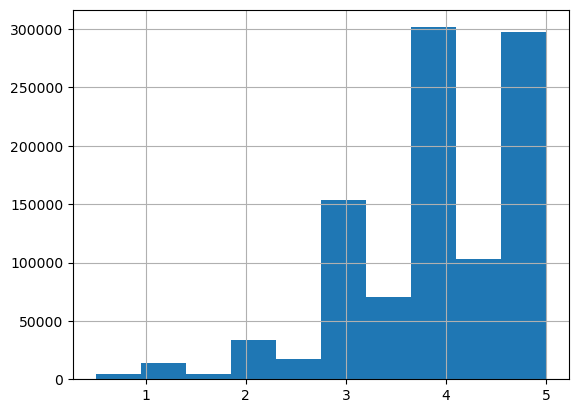

In [152]:
#Look at the data

# Calculate the number of unique values
print(subset[['rating']].nunique())

# Display a histogram of the values in the Rating column
subset['rating'].hist()
plt.show()

In [95]:
#Identifying The Correct Data/ Implicit v Explicit:

#Implicit: Indirect user actions for reccomendations (watched/views)
    
#Explicit: Direct user actions for reccomendations ( Ratings, comments/descritpions)

#Labels: user id, movie id, tags, timestamp, imbdbid, tmdbid, tagid, timestampx,y ,genre, tags?, releveance?

In [96]:
#Non-Personalized Reccomendations:

#Movie reccomendation based on highest number count in our dataset (most popular movie, implicit data: views)

# Get the counts of occurrences of each movie title
movie_popularity = subset["title"].value_counts()

print(movie_popularity)

#Based on movie popularity alone we can reccomend to users to watch Pulp Fiction, Shawshank Redemption, 
# or Silence of the Lambs, The (1991) since they are in the top 3.


title
Pulp Fiction (1994)                                                               67310
Shawshank Redemption, The (1994)                                                  63366
Silence of the Lambs, The (1991)                                                  63299
Star Wars: Episode IV - A New Hope (1977)                                         54502
Terminator 2: Judgment Day (1991)                                                 52244
Usual Suspects, The (1995)                                                        47006
Star Wars: Episode V - The Empire Strikes Back (1980)                             45313
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                                         44980
Seven (a.k.a. Se7en) (1995)                                                       43249
Mask, The (1994)                                                                  34384
Monty Python and the Holy Grail (1975)                                            33024
E.T. the Extra-Terrestrial

In [97]:
print(subset.value_counts().index)

MultiIndex([(     1,    2, 3.5, '2005-04-02 23:53:47', ...),
            ( 90938, 1196, 4.0, '2012-11-26 22:59:21', ...),
            ( 90939,   32, 5.0, '2009-03-28 06:40:56', ...),
            ( 90939,  541, 5.0, '2009-03-28 06:39:14', ...),
            ( 90940,   29, 3.0, '2001-06-28 02:38:18', ...),
            ( 90940,   32, 5.0, '2001-06-28 02:38:49', ...),
            ( 90940,  589, 5.0, '2001-06-28 02:38:18', ...),
            ( 90941,   32, 5.0, '1999-11-16 19:37:01', ...),
            ( 90941,   47, 4.0, '1999-11-16 20:45:44', ...),
            ( 90941,   50, 5.0, '1999-11-16 20:45:44', ...),
            ...
            ( 45354,  589, 4.5, '2005-03-07 21:52:00', ...),
            ( 45354,  919, 5.0, '2005-03-07 21:48:05', ...),
            ( 45354, 1090, 4.5, '2005-03-07 21:47:14', ...),
            ( 45354, 1097, 5.0, '2005-03-07 21:51:45', ...),
            ( 45354, 1196, 5.0, '2005-03-07 21:51:11', ...),
            ( 45355,    2, 0.5, '2006-01-24 14:12:43', ...),
        

In [154]:
#Movie reccomendations based on average rating of film(with and without frequency)



#here i used the big datafram to show that without including a threshold based on count,
# the highest rated movies will be unknown since they may have only been rated once.

average_rating_df = ratings_with_movies[["title", "rating"]].groupby('title').mean()

#Without a threshold
sorted_avg_rating_df = average_rating_df.sort_values(by="rating", ascending=False)

sorted_avg_rating_df.head()

#Bunch of highly avg. rated movies but they are unknown so the reccomendation bad

,rating
title,
Small Roads (2011),5.0
Divorce (1945),5.0
The Beautiful Story (1992),5.0
Into the Middle of Nowhere (2010),5.0
The Sea That Thinks (2000),5.0


In [99]:
#find titles that appear more than 100 items to avoid unknown or lowly rated films
popular_movies = movie_popularity[movie_popularity > 100].index

print(popular_movies)

# here we now see all the movies above 100 ratings counts/ views


#popular_movies list now filters the original data frame

popular_movies_rankings = ratings_with_movies[ratings_with_movies["title"].isin(popular_movies)]

print(popular_movies_rankings)

#dataframe with filtered movies

Index(['Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)',
       'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Terminator 2: Judgment Day (1991)', 'Usual Suspects, The (1995)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Mask, The (1994)',
       'Monty Python and the Holy Grail (1975)',
       'E.T. the Extra-Terrestrial (1982)', 'Blade Runner (1982)',
       'Die Hard (1988)', 'One Flew Over the Cuckoo's Nest (1975)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'Reservoir Dogs (1992)',
       'Interview with the Vampire: The Vampire Chronicles (1994)',
       'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
       '2001: A Space Odyssey (1968)', 'Clerks (1994)',
       'Wizard of Oz, The (1939)', 'Jumanji (1995)',
       'Monty Python's Life of Brian

In [155]:
# Find the average rating given to these "popular" watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())


#using the filtered dataframe we can average the ratings to see the movies with higher viewr frequencey of 100 or more

#now we can reccomened 

#Shawshank Redemption, The (1994)           4.446990
#Usual Suspects, The (1995)                 4.334372
#One Flew Over the Cuckoo's Nest (1975)              4.248079

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.446990
Usual Suspects, The (1995)                          4.334372
One Flew Over the Cuckoo's Nest (1975)              4.248079
Raiders of the Lost Ark (Indiana Jones and the ...  4.219009
Star Wars: Episode IV - A New Hope (1977)           4.190672


In [101]:
#Non-Personalized Suggestions based on most commonly watched/rated together by the same user, pair of movies. explicit: data, 
#implicit: # of user views


from itertools import permutations

#function to find all permutations, 2 films
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# use .apply to apply the function to the title column and reset the index
movie_combinations = subset.groupby('userId')['title'].apply(
  find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

                                                    movie_a  \
0                                            Jumanji (1995)   
1                                            Jumanji (1995)   
2                                            Jumanji (1995)   
3                                            Jumanji (1995)   
4                                            Jumanji (1995)   
...                                                     ...   
12135511  Star Wars: Episode V - The Empire Strikes Back...   
12135512  Star Wars: Episode V - The Empire Strikes Back...   
12135513  Star Wars: Episode V - The Empire Strikes Back...   
12135514  Star Wars: Episode V - The Empire Strikes Back...   
12135515  Star Wars: Episode V - The Empire Strikes Back...   

                                                    movie_b  
0         City of Lost Children, The (Cité des enfants p...  
1                 Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  
2                               Seven (a.k.a. Se7en) (199

In [102]:
print(movie_combinations.columns)
#print(combination_counts.columns)
print(combination_counts_df.columns)

Index(['movie_a', 'movie_b'], dtype='object')
Index(['movie_a', 'movie_b', 'size'], dtype='object')


In [103]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

                        movie_a  \
0  2001: A Space Odyssey (1968)   
1  2001: A Space Odyssey (1968)   
2  2001: A Space Odyssey (1968)   
3  2001: A Space Odyssey (1968)   
4  2001: A Space Odyssey (1968)   

                                             movie_b   size  
0                                Blade Runner (1982)  16503  
1  City of Lost Children, The (Cité des enfants p...   4385  
2                                      Clerks (1994)   8651  
3                                    Die Hard (1988)  13143  
4                                 Dragonheart (1996)   4651  


                movie_a                                            movie_b  \
55  Blade Runner (1982)          Star Wars: Episode IV - A New Hope (1977)   
56  Blade Runner (1982)  Star Wars: Episode V - The Empire Strikes Back...   
47  Blade Runner (1982)                                Pulp Fiction (1994)   
54  Blade Runner (1982)                   Silence of the Lambs, The (1991)   
57  Blade Runner (1982)                  Terminator 2: Judgment Day (1991)   
53  Blade Runner (1982)                   Shawshank Redemption, The (1994)   
58  Blade Runner (1982)          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
59  Blade Runner (1982)                         Usual Suspects, The (1995)   
43  Blade Runner (1982)             Monty Python and the Holy Grail (1975)   
36  Blade Runner (1982)                  E.T. the Extra-Terrestrial (1982)   
31  Blade Runner (1982)                       2001: A Space Odyssey (1968)   
34  Blade Runner (1982)                                    Die H

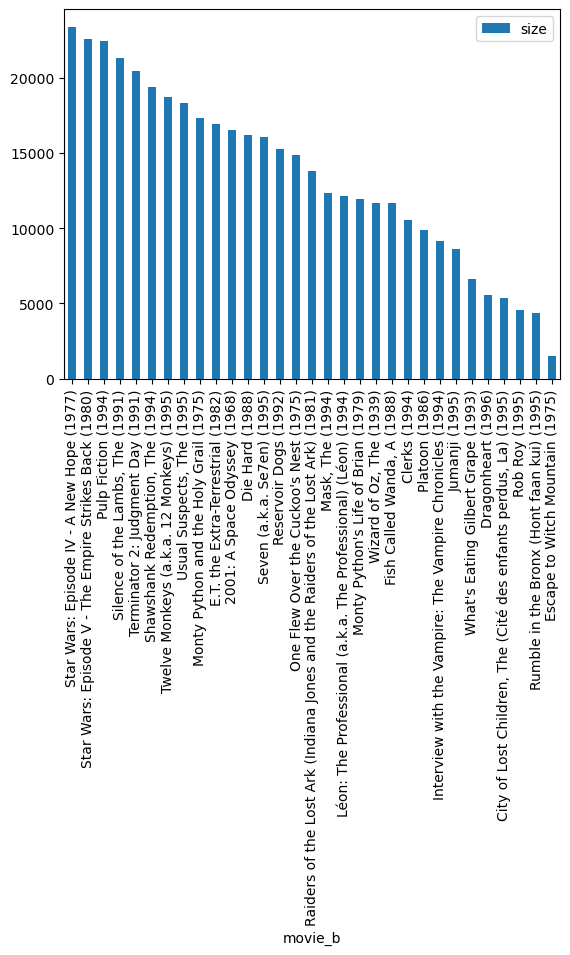

In [156]:

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the movies most frequently watched by people who watched City of Lost Children
city_df = combination_counts_df[combination_counts_df['movie_a'] == "Blade Runner (1982)"]

print(city_df)

# Plot the results
city_df.plot.bar(x="movie_b")
plt.show()

#here we can see every pair count from the data set between city of lost children and the corresponding movie_b

# the highest pair count for city of lost children is Starwars, 
# so we could reccomend Starwars to users who watched city of bladerunner. this makes sense since they are sci fi films

In [105]:
# Content-Based Recommendations

In [129]:
#Shorten The Ratings with Movies dataset size for testing



# Look at num of rows and columsn
num_rows, num_cols = ratings_with_movies.shape

print("rows:", num_rows)
print("columns:", num_cols)

#Subset data for testing below
subset = ratings_with_movies.head(1000000) 

# Now we can work with the 'subset' DataFrame for testing

num_rows, num_cols = subset.shape

print("rows:", num_rows)
print("columns:", num_cols)


print(subset.head())

rows: 20000263
columns: 6
rows: 1000000
columns: 6
   userId  movieId  rating            timestamp           title  \
0       1        2     3.5  2005-04-02 23:53:47  Jumanji (1995)   
1       5        2     3.0  1996-12-25 15:26:09  Jumanji (1995)   
2      13        2     3.0  1996-11-27 08:19:02  Jumanji (1995)   
3      29        2     3.0  1996-06-23 20:36:14  Jumanji (1995)   
4      34        2     3.0  1996-10-28 13:29:44  Jumanji (1995)   

                       genres  
0  Adventure|Children|Fantasy  
1  Adventure|Children|Fantasy  
2  Adventure|Children|Fantasy  
3  Adventure|Children|Fantasy  
4  Adventure|Children|Fantasy  


In [130]:
#vectorizing/ creating content-based data

movie_cross_table = pd.crosstab(subset['title'], subset['genres'])

print(movie_cross_table)



genres                                              Action|Adventure  \
title                                                                  
2001: A Space Odyssey (1968)                                       0   
Blade Runner (1982)                                                0   
City of Lost Children, The (Cité des enfants pe...                 0   
Clerks (1994)                                                      0   
Die Hard (1988)                                                    0   
Dragonheart (1996)                                                 0   
E.T. the Extra-Terrestrial (1982)                                  0   
Escape to Witch Mountain (1975)                                    0   
Fish Called Wanda, A (1988)                                        0   
Interview with the Vampire: The Vampire Chronic...                 0   
Jumanji (1995)                                                     0   
Léon: The Professional (a.k.a. The Professional...              

In [131]:
#import pandas as pd

# Assuming 'subset' is your DataFrame containing movie data
# Assuming 'movie_cross_table' is your cross-tabulation table

# Splitting the genres into separate columns
subset['genres'] = subset['genres'].str.split('|')

# Creating a new DataFrame to hold the cross-tabulation with separate genre columns
genre_cross_table = pd.DataFrame(index=subset.index)

# Iterating over each genre to create a column for each genre
for genre in subset['genres'].explode().unique():
     genre_cross_table[genre] = subset['genres'].apply(lambda x: 1 if genre in x else 0)

# Concatenating the new genre cross-table with the existing movie_cross_table
movie_genre_cross_table = pd.concat([subset[['title']], genre_cross_table], axis=1)

# Performing a group-by operation to combine rows with the same movie title
movie_genre_cross_table = movie_genre_cross_table.groupby('title').max()

print(movie_genre_cross_table)
num_rows, num_cols = movie_genre_cross_table.shape

print("rows:", num_rows)
print("columns:", num_cols)

C:\Users\Arbri\AppData\Local\Temp\ipykernel_6796\3182953474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['genres'] = subset['genres'].str.split('|')


                                                    Adventure  Children  \
title                                                                     
2001: A Space Odyssey (1968)                                1         0   
Blade Runner (1982)                                         0         0   
City of Lost Children, The (Cité des enfants pe...          1         0   
Clerks (1994)                                               0         0   
Die Hard (1988)                                             0         0   
Dragonheart (1996)                                          1         0   
E.T. the Extra-Terrestrial (1982)                           0         1   
Escape to Witch Mountain (1975)                             1         1   
Fish Called Wanda, A (1988)                                 0         0   
Interview with the Vampire: The Vampire Chronic...          0         0   
Jumanji (1995)                                              1         1   
Léon: The Professional (a

In [132]:
#take a look at jumanji genres and in the cross table 

# look a all genres in the subset
#print(subset)

jumanji_genres_ct = movie_genre_cross_table[movie_genre_cross_table.index == 'Jumanji (1995)']
print(jumanji_genres_ct)

                Adventure  Children  Fantasy  Drama  Mystery  Sci-Fi  \
title                                                                  
Jumanji (1995)          1         1        1      0        0       0   

                Thriller  Crime  Action  Comedy  Romance  War  Horror  Musical  
title                                                                           
Jumanji (1995)         0      0       0       0        0    0       0        0  


In [133]:
# Import numpy and the distance metric
import numpy as np
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform


# Extract rows from jumanji, starwars
jumanji_values = movie_genre_cross_table.loc['Jumanji (1995)'].values


# sim between jumanji and jumanji

print(jaccard_score(jumanji_values, jumanji_values))


starwars_values = movie_genre_cross_table.loc['Star Wars: Episode IV - A New Hope (1977)'].values

# sim between jumanji and starwars
print(jaccard_score(jumanji_values, starwars_values))

# sim between mask and jumanji
mask_values = movie_genre_cross_table.loc['Mask, The (1994)'].values

print(jaccard_score(jumanji_values, mask_values))


#we can see jumanji and itself have perfect sim of 1, jumanji and stars have sim of .2 and jumanji and mask have sim of 
#.166666666, this shows that jumanji and starwars are more similar than jumanjie and mask based on GENRE ATTRIBUTE.
#(later ill see if i can combine attributes like tag and genre and tag alone )


1.0
0.2
0.16666666666666666


In [134]:

# Calculate all pairwise distances
jaccard_distances = pdist(movie_genre_cross_table.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 -  squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_genre_cross_table.index, columns=movie_genre_cross_table.index)

# Print the top 5 rows of the DataFrame
print(jaccard_similarity_df)

title                                               2001: A Space Odyssey (1968)  \
title                                                                              
2001: A Space Odyssey (1968)                                            1.000000   
Blade Runner (1982)                                                     0.200000   
City of Lost Children, The (Cité des enfants pe...                      0.600000   
Clerks (1994)                                                           0.000000   
Die Hard (1988)                                                         0.000000   
Dragonheart (1996)                                                      0.200000   
E.T. the Extra-Terrestrial (1982)                                       0.500000   
Escape to Witch Mountain (1975)                                         0.200000   
Fish Called Wanda, A (1988)                                             0.000000   
Interview with the Vampire: The Vampire Chronic...                      0.25

In [135]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances using Euclidean distance
euclidean_distances = pdist(movie_genre_cross_table.values, metric='euclidean')
euclidean_similarity_array = 1 / (1 + squareform(euclidean_distances))

# Convert the distances to a square matrix and wrap it in a pandas DataFrame
euclidean_similarity_df = pd.DataFrame(euclidean_similarity_array, index=movie_genre_cross_table.index, columns=movie_genre_cross_table.index)

# Print the top 5 rows of the DataFrame
print("Euclidean similarity:")
print(euclidean_similarity_df.head())


Euclidean similarity:
title                                               2001: A Space Odyssey (1968)  \
title                                                                              
2001: A Space Odyssey (1968)                                            1.000000   
Blade Runner (1982)                                                     0.333333   
City of Lost Children, The (Cité des enfants pe...                      0.414214   
Clerks (1994)                                                           0.333333   
Die Hard (1988)                                                         0.289898   

title                                               Blade Runner (1982)  \
title                                                                     
2001: A Space Odyssey (1968)                                   0.333333   
Blade Runner (1982)                                            1.000000   
City of Lost Children, The (Cité des enfants pe...             0.289898   
Clerks (1994) 

In [136]:

# Calculate pairwise similarities using Cosine similarity
cosine_similarity_array = cosine_similarity(movie_genre_cross_table.values)

# Convert the similarities to a square matrix and wrap it in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=movie_genre_cross_table.index, columns=movie_genre_cross_table.index)

# Print the top 5 rows of the DataFrame
print("\nCosine similarity:")
print(cosine_similarity_df.head())


Cosine similarity:
title                                               2001: A Space Odyssey (1968)  \
title                                                                              
2001: A Space Odyssey (1968)                                            1.000000   
Blade Runner (1982)                                                     0.333333   
City of Lost Children, The (Cité des enfants pe...                      0.774597   
Clerks (1994)                                                           0.000000   
Die Hard (1988)                                                         0.000000   

title                                               Blade Runner (1982)  \
title                                                                     
2001: A Space Odyssey (1968)                                   0.333333   
Blade Runner (1982)                                            1.000000   
City of Lost Children, The (Cité des enfants pe...             0.258199   
Clerks (1994)   

In [137]:

# Find the values for the movie Thor
jaccard_similarity_series = jaccard_similarity_df.loc['Jumanji (1995)']

# Sort these values from highest to lowest
ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities)




title
Jumanji (1995)                                                                    1.000000
Escape to Witch Mountain (1975)                                                   1.000000
Wizard of Oz, The (1939)                                                          0.750000
Dragonheart (1996)                                                                0.500000
Monty Python and the Holy Grail (1975)                                            0.500000
City of Lost Children, The (Cité des enfants perdus, La) (1995)                   0.333333
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.250000
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.200000
Star Wars: Episode IV - A New Hope (1977)                                         0.200000
2001: A Space Odyssey (1968)                                                      0.200000
E.T. the Extra-Terrestrial (1982)                                                 0.

In [138]:
# Find the values for the movie "Jumanji (1995)" using Euclidean distance
euclidean_similarity_series = euclidean_similarity_df.loc['Jumanji (1995)']

# Sort these values from highest to lowest
ordered_euclidean_similarities = euclidean_similarity_series.sort_values(ascending=False)

# Print the results for Euclidean similarity
print("Similar movies based on Euclidean similarity:")
print(ordered_euclidean_similarities)



Similar movies based on Euclidean similarity:
title
Escape to Witch Mountain (1975)                                                   1.000000
Jumanji (1995)                                                                    1.000000
Wizard of Oz, The (1939)                                                          0.500000
Monty Python and the Holy Grail (1975)                                            0.414214
Dragonheart (1996)                                                                0.414214
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.366025
What's Eating Gilbert Grape (1993)                                                0.333333
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.333333
Star Wars: Episode IV - A New Hope (1977)                                         0.333333
One Flew Over the Cuckoo's Nest (1975)                                            0.333333
Monty Python's Life of Brian (1979)   

In [139]:
# Find the values for the movie "Jumanji (1995)" using Cosine similarity
cosine_similarity_series = cosine_similarity_df.loc['Jumanji (1995)']

# Sort these values from highest to lowest
ordered_cosine_similarities = cosine_similarity_series.sort_values(ascending=False)

# Print the results for Cosine similarity
print("\nSimilar movies based on Cosine similarity:")
print(ordered_cosine_similarities)


Similar movies based on Cosine similarity:
title
Jumanji (1995)                                                                    1.000000
Escape to Witch Mountain (1975)                                                   1.000000
Wizard of Oz, The (1939)                                                          0.866025
Dragonheart (1996)                                                                0.666667
Monty Python and the Holy Grail (1975)                                            0.666667
City of Lost Children, The (Cité des enfants perdus, La) (1995)                   0.516398
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.408248
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.333333
Star Wars: Episode IV - A New Hope (1977)                                         0.333333
2001: A Space Odyssey (1968)                                                      0.333333
E.T. the Extra-Terrestrial (1982)       

In [117]:
#Using jaccard, cosine and eucledian, movie with highest sim to jumanji based on genre is City of Lost Children

In [118]:
#TFIDF WITH TAGS??? descriptions??, contentbased with tags?

In [119]:
# Collaborative Filtering

In [140]:
#Shorten The Ratings with Movies dataset size for testing
#FINDING SIMILARLY LIKE MOVIES, finding similar movies based on how user rate them


# Look at num of rows and columsn
num_rows, num_cols = ratings_with_movies.shape

print("rows:", num_rows)
print("columns:", num_cols)

#Subset data for testing below
subset = ratings_with_movies.head(1000000) 

# Now we can work with the 'subset' DataFrame for testing
num_rows, num_cols = subset.shape
print("rows:", num_rows)
print("columns:", num_cols)

rows: 20000263
columns: 6
rows: 1000000
columns: 6


In [141]:
print(subset.head())

   userId  movieId  rating            timestamp           title  \
0       1        2     3.5  2005-04-02 23:53:47  Jumanji (1995)   
1       5        2     3.0  1996-12-25 15:26:09  Jumanji (1995)   
2      13        2     3.0  1996-11-27 08:19:02  Jumanji (1995)   
3      29        2     3.0  1996-06-23 20:36:14  Jumanji (1995)   
4      34        2     3.0  1996-10-28 13:29:44  Jumanji (1995)   

                       genres  
0  Adventure|Children|Fantasy  
1  Adventure|Children|Fantasy  
2  Adventure|Children|Fantasy  
3  Adventure|Children|Fantasy  
4  Adventure|Children|Fantasy  


In [142]:
# Transform the table
user_ratings_table = subset.pivot(index='userId', columns='title', values='rating')
# Inspect the transformed table
print(user_ratings_table.head())

title   2001: A Space Odyssey (1968)  Blade Runner (1982)  \
userId                                                      
1                                3.5                  4.0   
2                                5.0                  5.0   
3                                5.0                  5.0   
4                                NaN                  NaN   
5                                NaN                  NaN   

title   City of Lost Children, The (Cité des enfants perdus, La) (1995)  \
userId                                                                    
1                                                     3.5                 
2                                                     NaN                 
3                                                     NaN                 
4                                                     NaN                 
5                                                     NaN                 

title   Clerks (1994)  Die Hard (1988)  Dragon

In [143]:
#NOTE: 
#    Pulp Fiction  Forrest Gump  Toy Story  The Matrix
#User_A             4             1          1           5
#User_B             5             1          1           4
#User_C             2             4          5           2
#User_D             1             4          4           2

#Users A and B rate "The Matrix" and "Pulp Fiction" highly. 
#It is likely that they would both give other movies similar ratings too.
# So using content based we can find which movies have the highest similarity to the matrix, pulp fiction or both. 
#Then based on that reccomendation, well know users A and B would like ?

In [144]:
#fill in missing na values with 0 without skewing the results since 0 indicates a bad movie ratings

# Get the average rating for each user 
avg_ratings = user_ratings_table.mean(axis=1)
print(avg_ratings.head())

# Center each users ratings around 0 by subtracting the avg user rating with inital rating
user_ratings_table_centered = user_ratings_table.sub(avg_ratings, axis=0)
print(user_ratings_table_centered.head())

# Fill in the missing data with 0s
user_ratings_table_normed = user_ratings_table_centered.fillna(0)

print(user_ratings_table_normed.head())

userId
1    3.734375
2    5.000000
3    4.588235
4    2.666667
5    4.538462
dtype: float64
title   2001: A Space Odyssey (1968)  Blade Runner (1982)  \
userId                                                      
1                          -0.234375             0.265625   
2                           0.000000             0.000000   
3                           0.411765             0.411765   
4                                NaN                  NaN   
5                                NaN                  NaN   

title   City of Lost Children, The (Cité des enfants perdus, La) (1995)  \
userId                                                                    
1                                               -0.234375                 
2                                                     NaN                 
3                                                     NaN                 
4                                                     NaN                 
5                             

In [145]:
# Transpose the user_ratings_subset DataFrame
movie_ratings_subset = user_ratings_table.T

print(movie_ratings_subset)

userId                                              1       2       3       \
title                                                                        
2001: A Space Odyssey (1968)                           3.5     5.0     5.0   
Blade Runner (1982)                                    4.0     5.0     5.0   
City of Lost Children, The (Cité des enfants pe...     3.5     NaN     NaN   
Clerks (1994)                                          4.0     NaN     5.0   
Die Hard (1988)                                        4.0     NaN     NaN   
Dragonheart (1996)                                     3.0     NaN     NaN   
E.T. the Extra-Terrestrial (1982)                      4.0     NaN     5.0   
Escape to Witch Mountain (1975)                        3.5     NaN     NaN   
Fish Called Wanda, A (1988)                            4.0     NaN     4.0   
Interview with the Vampire: The Vampire Chronic...     4.0     NaN     NaN   
Jumanji (1995)                                         3.5     N

In [146]:
#fill in missing na values with 0 without skewing the results since 0 indicates a bad movie ratings

# Get the average rating for each user 
movie_avg_ratings = movie_ratings_subset.mean(axis=1)
print(movie_avg_ratings.head())

# Center each users ratings around 0 by subtracting the avg user rating with inital rating
movie_ratings_table_centered = movie_ratings_subset.sub(movie_avg_ratings, axis=0)
print(user_ratings_table_centered.head())

# Fill in the missing data with 0s
movie_ratings_table_normed = movie_ratings_table_centered.fillna(0)

print(movie_ratings_table_normed.head())

title
2001: A Space Odyssey (1968)                                       3.955748
Blade Runner (1982)                                                4.133706
City of Lost Children, The (Cité des enfants perdus, La) (1995)    3.952230
Clerks (1994)                                                      3.869551
Die Hard (1988)                                                    3.933847
dtype: float64
title   2001: A Space Odyssey (1968)  Blade Runner (1982)  \
userId                                                      
1                          -0.234375             0.265625   
2                           0.000000             0.000000   
3                           0.411765             0.411765   
4                                NaN                  NaN   
5                                NaN                  NaN   

title   City of Lost Children, The (Cité des enfants perdus, La) (1995)  \
userId                                                                    
1                    

In [147]:
from sklearn.metrics.pairwise import cosine_similarity

# Assign the arrays to variables
sw_IV = movie_ratings_table_normed.loc['Star Wars: Episode IV - A New Hope (1977)', :].values.reshape(1, -1)
sw_V = movie_ratings_table_normed.loc['Jumanji (1995)', :].values.reshape(1, -1)

# Find the similarity between two Star Wars movies
similarity_A = cosine_similarity(sw_IV, sw_V)

[print(similarity_A)]

# Assign the arrays to variables
jurassic_park = movie_ratings_table_normed.loc['Jumanji (1995)', :].values.reshape(1, -1)
pulp_fiction = movie_ratings_table_normed.loc['Pulp Fiction (1994)', :].values.reshape(1, -1)

# Find the similarity between Pulp Fiction and Jurassic Park
similarity_B = cosine_similarity(jurassic_park, pulp_fiction)

print(similarity_B)


#users who like jumanji are more likely to like starwars than pulpfiction based on similarity 

[[0.06847529]]
[[-0.01897923]]


In [148]:
from sklearn.metrics.pairwise import cosine_similarity

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_table_normed)

# Wrap the similarities in a DataFrame
cosine_similarity_df = pd.DataFrame(similarities, index=movie_ratings_table_normed.index, columns=movie_ratings_table_normed.index)

# Find the similarity values for a specific movie
cosine_similarity_series = cosine_similarity_df.loc['Star Wars: Episode IV - A New Hope (1977)']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

print(ordered_similarities)

#the most similar movie to Star Wars: Episode IV was Star Wars: Episode V,Indiana Jones and ET. All movies around around the same time

title
Star Wars: Episode IV - A New Hope (1977)                                         1.000000
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.536905
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.238081
E.T. the Extra-Terrestrial (1982)                                                 0.161022
Terminator 2: Judgment Day (1991)                                                 0.159211
Die Hard (1988)                                                                   0.148689
Monty Python and the Holy Grail (1975)                                            0.120228
Silence of the Lambs, The (1991)                                                  0.107845
Blade Runner (1982)                                                               0.101743
Shawshank Redemption, The (1994)                                                  0.098096
Wizard of Oz, The (1939)                                                          0.

In [ ]:
#Predicting how a user might rate a movie even if it is not similar to any movie they have seen

In [ ]:
# Matrix Factorization and Validating Your Predictions